<a href="https://colab.research.google.com/github/NadiaLayraAziza/Skripsi_Nadia_2023/blob/main/Skripsi_Nadia_Progres_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from skimage import color
from skimage import io
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

Loop: 361.92798614501953 ms
Loop: 12.04538345336914 ms


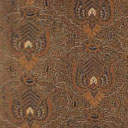

Grayscale


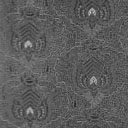

Binary (Otsu Thresholding)


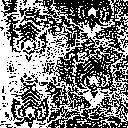

In [5]:
# Import the image in grayscale
img = cv2.imread("/content/drive/MyDrive/SKRIPSI/Dataset/Cuwiri/B39_1.jpg")
# img_gray = color.rgb2gray(img)

## Read as BGR
# img = cv2.imread("test.png")

## (1) Loop to calculate
ts = time.time()
H,W = img.shape[:2]
gray = np.zeros((H,W), np.uint8)
for i in range(H):
    for j in range(W):
        gray[i,j] = np.clip(0.1141 * img[i,j,0]  + 0.5870 * img[i,j,1] + 0.2989 * img[i,j,2], 0, 255)

t = (time.time() -ts)
print("Loop: {:} ms".format(t*1000))

## (2) matrix multiply
ts = time.time()
w = np.array([[[ 0.1141, 0.5870, 0.2989]]])
gray2 = cv2.convertScaleAbs(np.sum(img*w, axis=2))
t = (time.time() -ts)
print("Loop: {:} ms".format(t*1000))

## (3) display
cv2_imshow(img)
# cv2_imshow(gray)
print("Grayscale")
cv2_imshow(gray2)
cv2.waitKey()

ret,img_otsu_binary = cv2.threshold(gray2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

print("Binary (Otsu Thresholding)")
cv2_imshow(img_otsu_binary)

image_ori = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# coba = cv2.imread(gray2)

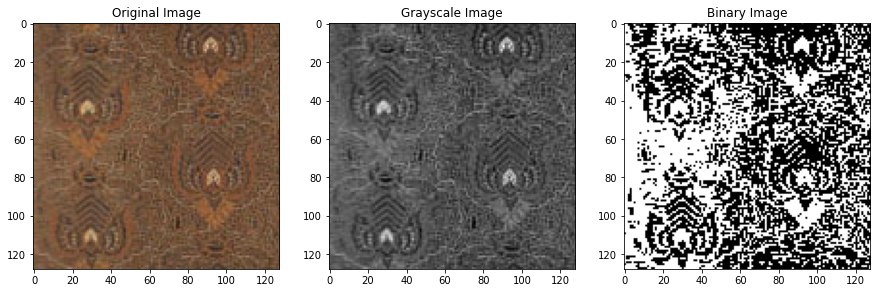

In [6]:
# Plot the images
images = [image_ori, gray2, img_otsu_binary]
titles = ['Original Image', 'Grayscale Image', 'Binary Image']
plot_img(images, titles)

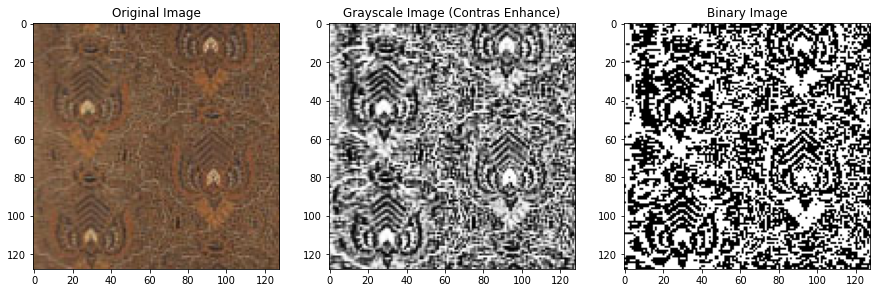

In [7]:
gray_img_eqhist = cv2.equalizeHist(gray2)
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
ret,img_otsu_binary = cv2.threshold(gray_img_clahe,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Plot the images
images = [image_ori, gray_img_clahe, img_otsu_binary]
titles = ['Original Image', 'Grayscale Image (Contras Enhance)', 'Binary Image']
plot_img(images, titles)

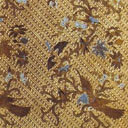

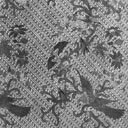

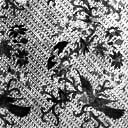

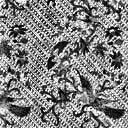

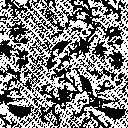

In [8]:
img = cv2.imread("/content/drive/MyDrive/SKRIPSI/Dataset/Bali/B29_4.jpg")
w = np.array([[[ 0.1141, 0.5870, 0.2989]]])
gray2 = cv2.convertScaleAbs(np.sum(img*w, axis=2))
gray_img_eqhist = cv2.equalizeHist(gray2)
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
ret,img_otsu_binary = cv2.threshold(gray_img_clahe,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(img)
cv2_imshow(gray2)
cv2_imshow(gray_img_eqhist)
cv2_imshow(gray_img_clahe)
cv2_imshow(img_otsu_binary)